In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
plt.rcParams['figure.figsize'] = [17, 8]

In [2]:
import torch
from torch.utils.data import DataLoader

In [3]:
from dataset.audio_dataset import AudioData, default
from model.autoencoder.encoder import Encoder
from model.autoencoder.decoder import Decoder
from model.ddsp.harmonic_oscillator import OscillatorBank

/home/kureta/.conda/envs/ddsp-pytorch/lib/python3.8/site-packages/torchaudio/backend/utils.py:53: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(


In [4]:
dataset = AudioData(clear=False)

Loading presaved dataset...


In [5]:
audio = dataset[0]
audio.shape

torch.Size([88064])

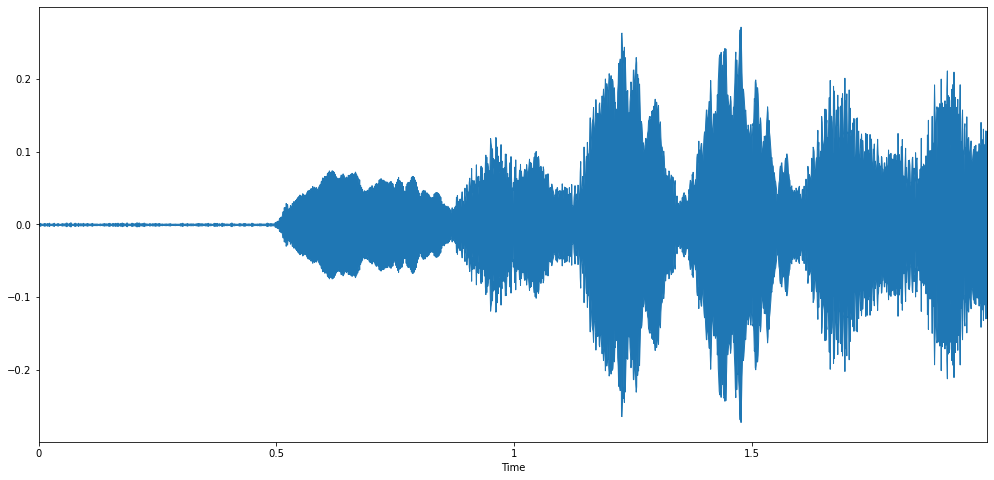

In [6]:
librosa.display.waveplot(audio.numpy(), sr=default.sample_rate)

In [7]:
loader = DataLoader(dataset, 10, shuffle=True)

In [8]:
for batch in loader:
    print(batch.shape)
    break

torch.Size([10, 88064])


In [9]:
encoder = Encoder()

In [10]:
with torch.no_grad():
    y = encoder(batch)

/home/kureta/.conda/envs/ddsp-pytorch/lib/python3.8/site-packages/torch/functional.py:515: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370172916/work/aten/src/ATen/native/SpectralOps.cpp:653.)
  return _VF.stft(input, n_fft, hop_length, win_length, window,  # type: ignore
/home/kureta/.conda/envs/ddsp-pytorch/lib/python3.8/site-packages/torch/functional.py:515: UserWarning: The function torch.rfft is deprecated and will be removed in a future PyTorch release. Use the new torch.fft module functions, instead, by importing torch.fft and calling torch.fft.fft or torch.fft.rfft. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370172916/work/aten/src/ATen/native/SpectralOps.cpp:590.)
  return _VF.stft(input, n_fft, hop_length, win_length, window

In [11]:
decoder = Decoder()

In [12]:
with torch.no_grad():
    control = decoder(y)

torch.Size([10, 173, 100]) torch.Size([10, 173, 1])


/home/kureta/Documents/repos/personal/ddsp-pytorch/model/autoencoder/decoder.py:149: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  c = F.softmax(self.dense_harmonic(latent))


In [13]:
synth = OscillatorBank()

In [14]:
control['f0'] *=440
with torch.no_grad():
    audio_hat = synth(control)[:, 256:-256]

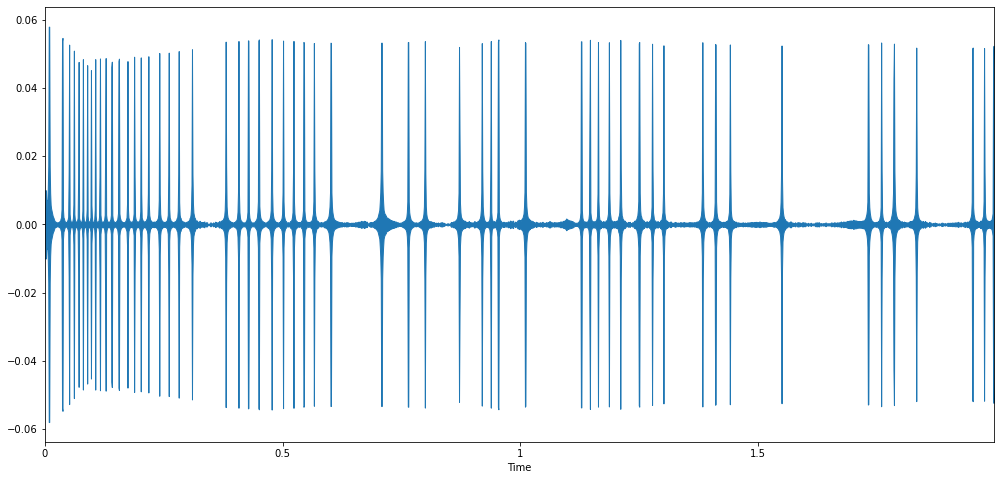

In [15]:
librosa.display.waveplot(audio_hat[0].numpy(), sr=default.sample_rate)

In [16]:
ipd.Audio(data=audio_hat[0].numpy(), rate=default.sample_rate)

In [17]:
audio_hat.shape, batch.shape

(torch.Size([10, 88064]), torch.Size([10, 88064]))

In [24]:
for idx, val in enumerate([9, 3, 5]):
    print(idx, val)

0 9
1 3
2 5
